In [20]:
!pip install --upgrade openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 250.9/250.9 kB 856.5 kB/s eta 0:00:00


In [1]:
import pandas as pd
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
eng_stop_words=stopwords.words('English')
import numpy as np

In [2]:
data=pd.read_excel('imdb.xlsx')

sentiment
positive    558
negative    556
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

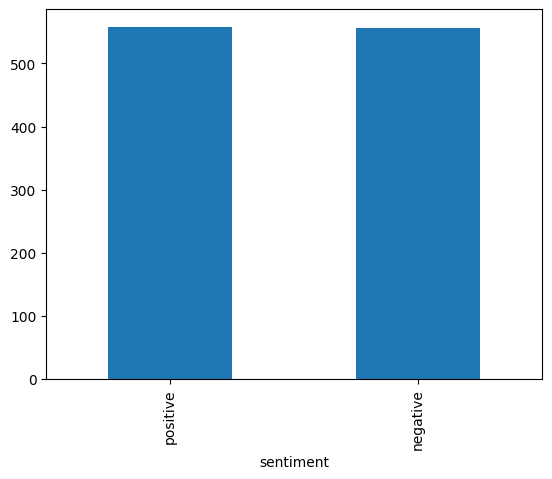

In [3]:
print(data.value_counts('sentiment'))
data.value_counts('sentiment').plot(kind='bar')

In [4]:
map_dict={'positive':1,'negative':0}
data['sentiment_numeric']=data.sentiment.map(map_dict)
data.head()

,review,sentiment,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [5]:
ps=PorterStemmer()
corpus=set()
def preprocess(text):
    text=text.strip()
    text=re.sub("<[^>]*>","", text)
    text=re.sub('[^a-zA-Z]',' ', text)
    text=text.lower()
    text=text.split()
    text=[w for w in text if not w in eng_stop_words]
    text=[ps.stem(word) for word in text]
    text=' '.join(text)
    return text

In [6]:
data['Preprocessed_review']=data.review.apply(preprocess)
data.head()

,review,sentiment,sentiment_numeric,Preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,1,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visual stun film...


In [7]:
data.shape

(1114, 4)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(data.Preprocessed_review, 
                                                   data.sentiment_numeric, 
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=data.sentiment_numeric)

In [9]:
x_train.shape, x_test.shape

((891,), (223,))

In [10]:
y_train.shape, y_test.shape

((891,), (223,))

In [11]:
tf_idf=TfidfVectorizer()

In [12]:
tf_idf

TfidfVectorizer()

In [13]:
x_train_tf= tf_idf.fit_transform(x_train)
x_train_tf

<891x11806 sparse matrix of type '<class 'numpy.float64'>'
	with 83678 stored elements in Compressed Sparse Row format>

In [14]:
x_train_tf.shape

(891, 11806)

In [15]:
naive_bayes_classifier=MultinomialNB()
naive_bayes_classifier.fit(x_train_tf,y_train)

MultinomialNB()

In [16]:
x_test_tf= tf_idf.transform(x_test)
x_test_tf

<223x11806 sparse matrix of type '<class 'numpy.float64'>'
	with 18513 stored elements in Compressed Sparse Row format>

In [17]:

y_pred=naive_bayes_classifier.predict(x_test_tf)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [19]:
text_preprocessed=preprocess("pushpa movie is good but no comedy")
